In [24]:
import numpy as np
import gmplot
import pandas as pd
import time
from IPython.display import HTML
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt

In [25]:
# Reading file and changing column type to int for desired columns
df = pd.read_csv('large_df_Apr01202222:09:19.csv')
ocurrences_column_names = df.columns.values.tolist()[4:]
for column in ocurrences_column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [26]:
# Total crime ocurrences column
df['Total Ocorrencias'] = df.iloc[:, 4:].sum(axis=1)

# Grouping total ocurrences by PD
df = df.groupby(['DP', 'Coordenadas', 'Ano'])[
'Total Ocorrencias'].sum().reset_index()

print(df)

                           DP                 Coordenadas   Ano  \
0                 001 DP - Sé  [-23.5569803, -46.6343707]  2001   
1                 001 DP - Sé  [-23.5569803, -46.6343707]  2002   
2                 001 DP - Sé  [-23.5569803, -46.6343707]  2003   
3                 001 DP - Sé  [-23.5569803, -46.6343707]  2004   
4                 001 DP - Sé  [-23.5569803, -46.6343707]  2005   
...                       ...                         ...   ...   
2041  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2018   
2042  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2019   
2043  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2020   
2044  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2021   
2045  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2022   

      Total Ocorrencias  
0              9046.000  
1             11819.000  
2             11115.000  
3             13998.000  
4             14952.006  
...                 ...  
2041         

In [27]:
df = df.pivot_table(index='Ano', columns='DP', values='Total Ocorrencias')
df = df[:-1]
print(df)

DP    001 DP - Sé  002 DP - Bom Retiro  003 DP - Campos Elísios  \
Ano                                                               
2001     9046.000             2479.000                11249.000   
2002    11819.000             2090.000                13081.000   
2003    11115.000             2329.000                12027.000   
2004    13998.000             2940.000                12265.000   
2005    14952.006             3003.000                11736.000   
2006    14121.188             3489.000                11473.000   
2007    12569.017             2810.000                 9601.000   
2008    10941.721             2699.000                 8742.000   
2009    10596.322             2786.000                10139.000   
2010    10958.263             3019.000                 9993.000   
2011    10684.268             3159.000                 9762.211   
2012     9516.999             3257.000                10173.000   
2013    12737.128             3387.000                 9746.14

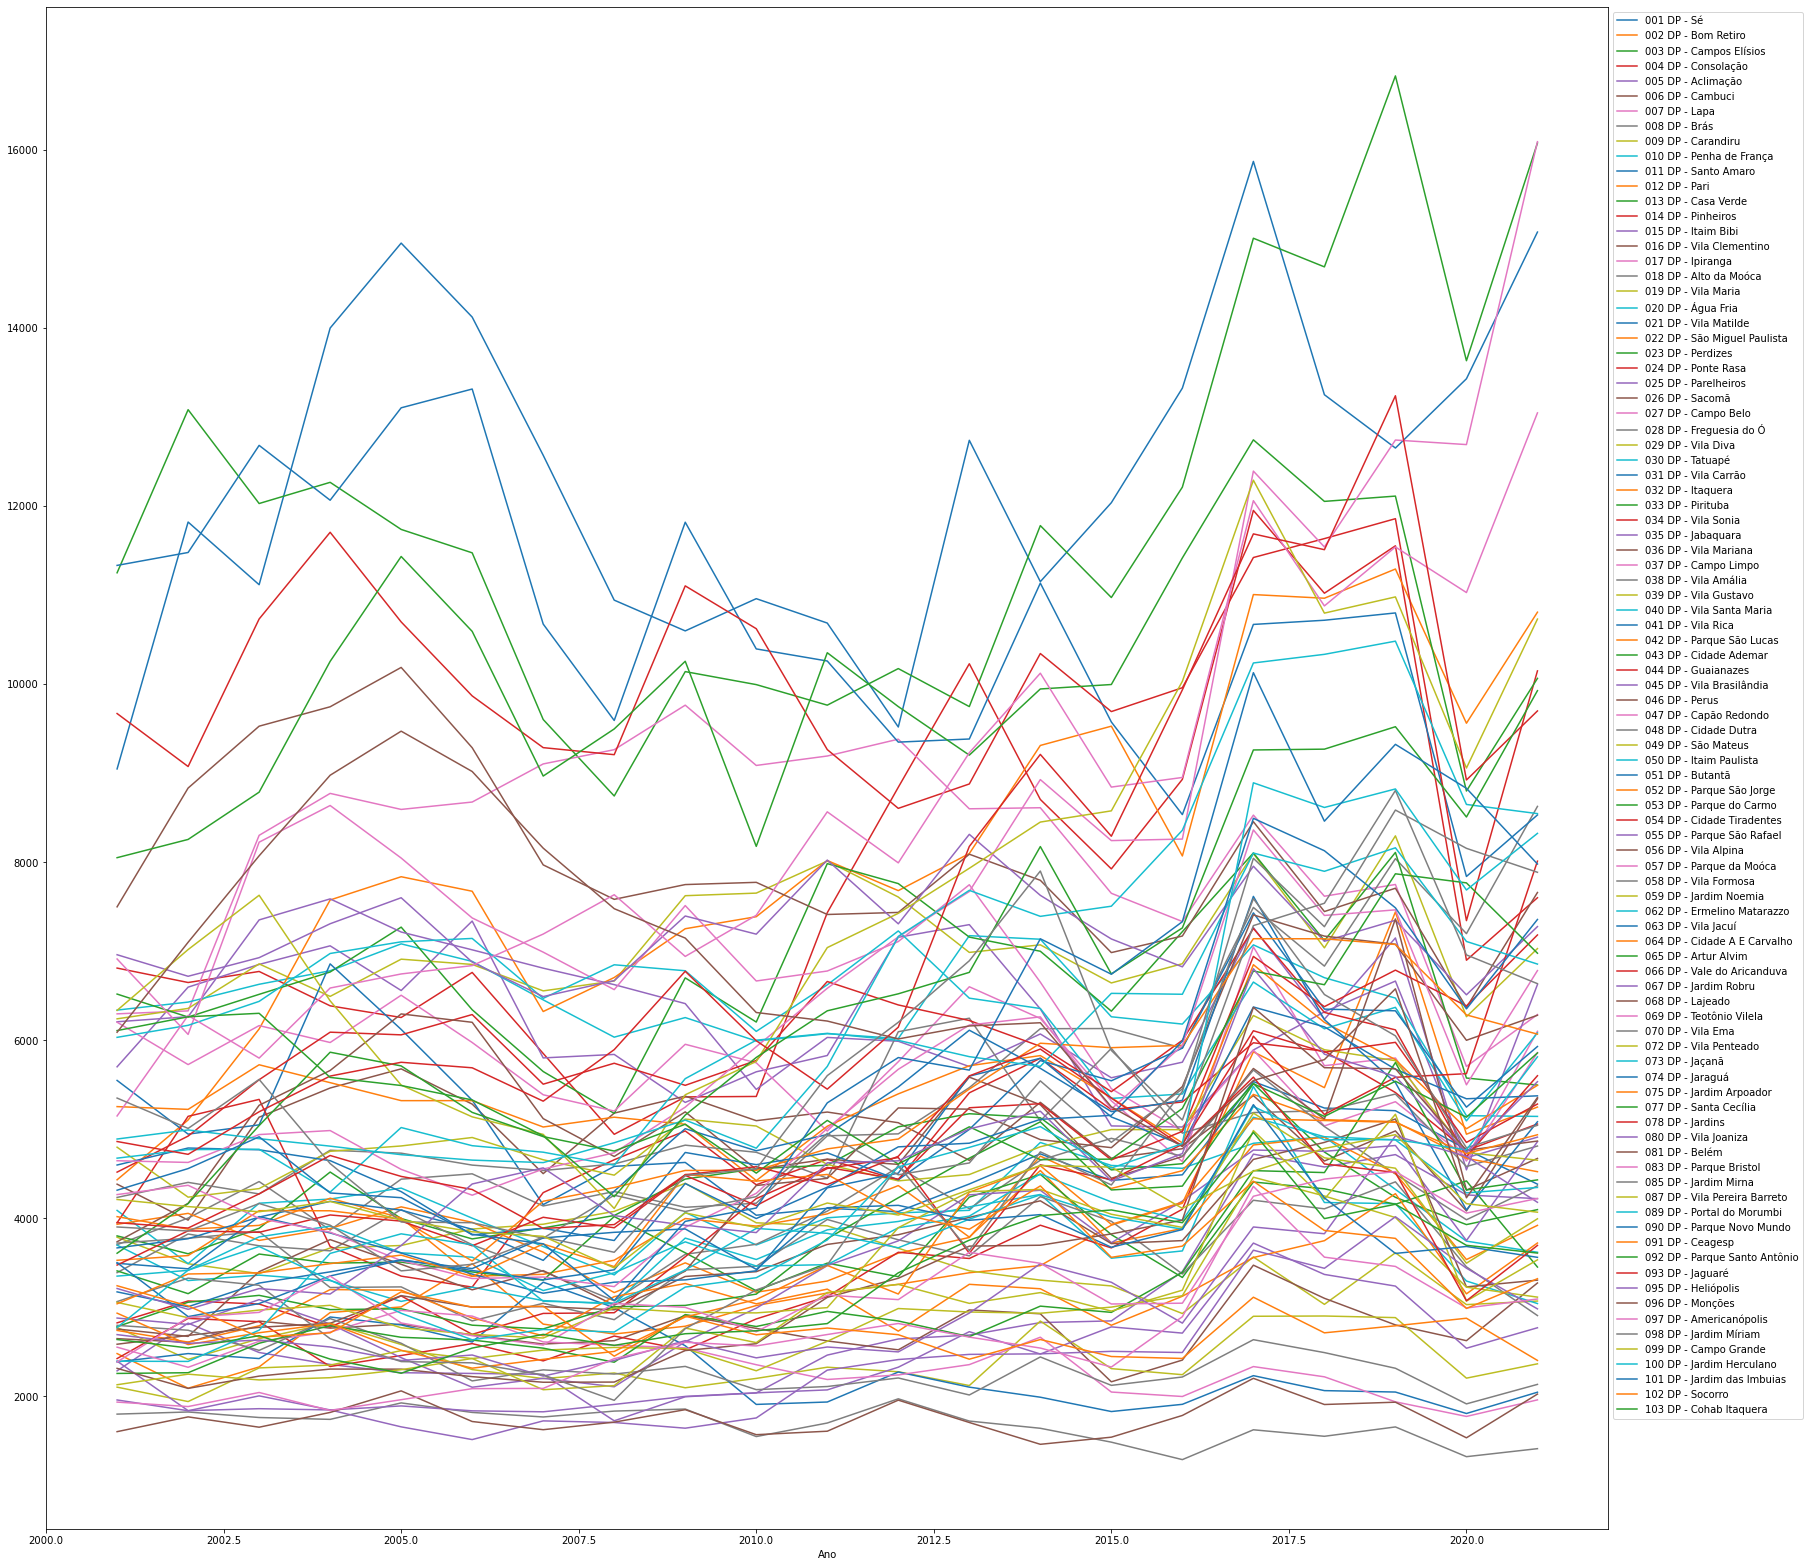

In [37]:
df.plot(figsize=(28,28)).legend(bbox_to_anchor=(1.0, 1.0))